# EDA on Raw Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


from pathlib import Path

In [4]:
dataset_folder = Path("../datasets")

df = pd.read_pickle(dataset_folder / "20251004_065231_reddit_posts.pkl")
df.head()

,source,query,topic,comments_nested,comments_flat,num_comments,total_words
0,reddit,"""Palo Alto"" (school OR schools OR district OR ...",Mark Zuckerberg and his wife shut down their s...,[[It's almost as if schools should be funded b...,[It's almost as if schools should be funded by...,82,2627
1,reddit,"""Palo Alto"" (school OR schools OR district OR ...",Mark Zuckerberg and his wife shut down their s...,[[Delete your Facebook. Delete IG. Delete Wh...,[Delete your Facebook. Delete IG. Delete Wha...,18,513
2,reddit,"""Palo Alto"" (school OR schools OR district OR ...","Bay Area teen rejected by 16 colleges, hired b...",[[Quote from another comment on this topic fro...,[Quote from another comment on this topic from...,126,6425
3,reddit,"""Palo Alto"" (school OR schools OR district OR ...",To be a philanthropist. Mark Zuckerberg and hi...,"[[Nothing says ""cutting-edge wave of the futur...","[Nothing says ""cutting-edge wave of the future...",12,316
4,reddit,"""Palo Alto"" (school OR schools OR district OR ...",Are you kicking kids out by 18? (Or if you wer...,[[Fuck no. I am doing my best to ensure that t...,[Fuck no. I am doing my best to ensure that th...,160,9382


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           78 non-null     object
 1   query            78 non-null     object
 2   topic            78 non-null     object
 3   comments_nested  78 non-null     object
 4   comments_flat    78 non-null     object
 5   num_comments     78 non-null     int64 
 6   total_words      78 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 4.4+ KB


In [26]:
cat_cols = ["source", "query", "topic", "comments_nested", "comments_flat"]
num_cols = ["num_comments", "total_words"]

In [27]:
df[cat_cols].describe(include="all")

,source,query,topic,comments_nested,comments_flat
count,78,78,78,78,78
unique,1,1,73,78,78
top,reddit,"""Palo Alto"" (school OR schools OR district OR ...",Mark Zuckerberg and his wife shut down their s...,[[It's almost as if schools should be funded b...,[It's almost as if schools should be funded by...
freq,78,78,4,1,1


In [28]:
df[num_cols].describe(include="all")

,num_comments,total_words
count,78.000000,78.000000
mean,41.833333,2164.141026
std,51.706318,3088.048956
min,1.000000,21.000000
25%,7.000000,361.750000
50%,19.000000,956.500000
75%,57.750000,2617.750000
max,266.000000,17765.000000


In [15]:
def show_histogram(
    dataframe, column, title=None, xlabel=None, bins=20, edgecolor="black"
):
    plt.hist(dataframe[column], bins=bins, edgecolor=edgecolor)
    plt.title(title or "Distribution")
    plt.xlabel(xlabel or column)
    plt.ylabel("Count")
    plt.show()

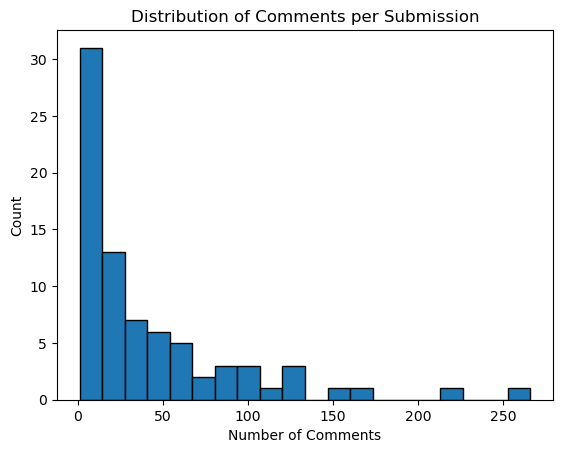

In [16]:
show_histogram(
    df,
    "num_comments",
    title="Distribution of Comments per Submission",
    xlabel="Number of Comments",
)

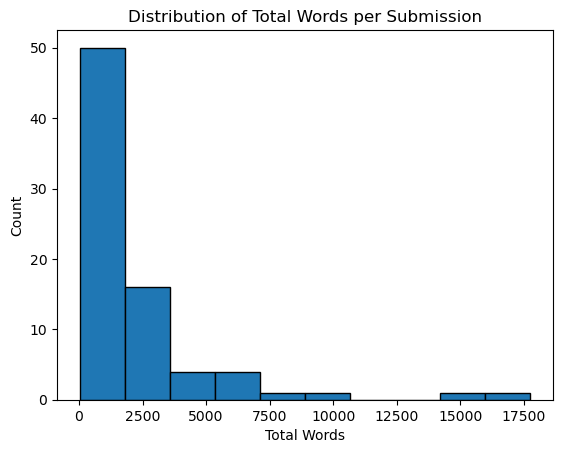

In [22]:
show_histogram(
    df,
    "total_words",
    title="Distribution of Total Words per Submission",
    xlabel="Total Words",
    bins=10,
)